In [1]:
import config
import torch
import sys
sys.path.append('../util')
sys.path.append('../others_networks')
sys.path.append('../UMergeNet')
import time
from Trainer import MulticlassTrainer
from util import measure_inference_speed, count_trainable_parameters, clear_gpu
from DatasetReader import *

from UMergeNet import ConvType, UMergeNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
result_path = './UMergeNet/'

In [2]:
# from util import compile_xls_best_results
# compile_xls_best_results(result_path, output_file="UMergeNet.xlsx")

In [3]:
num_classes = config.num_classes
in_channels = config.in_channels

train_loader, test_loader, val_loader = get_datasets(dataset_dir=config.dataset_path, 
                                              resolution=config.dataset_resolution, 
                                              batch_size=config.batch_size)

torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])


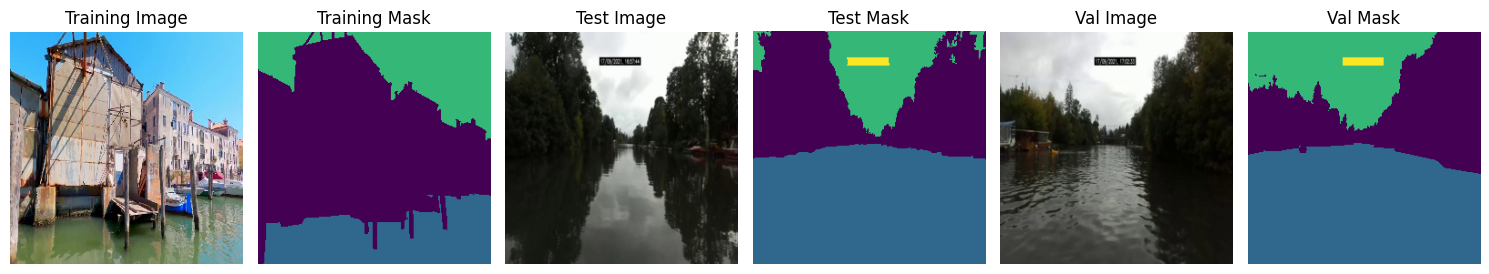

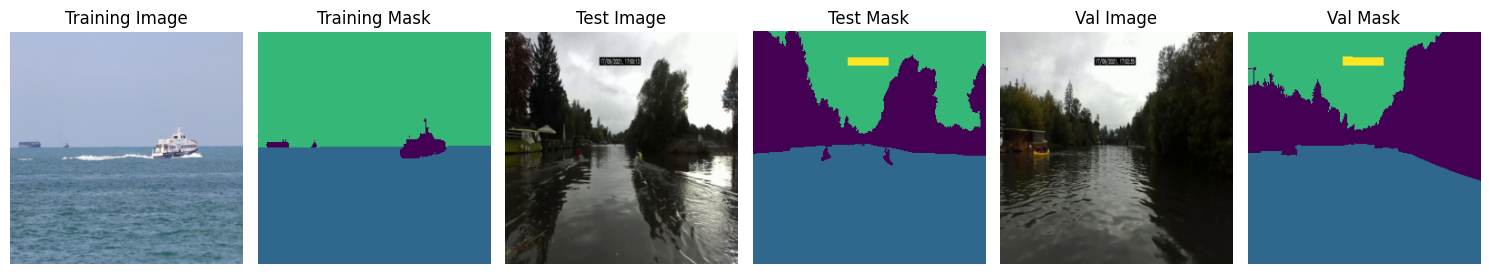

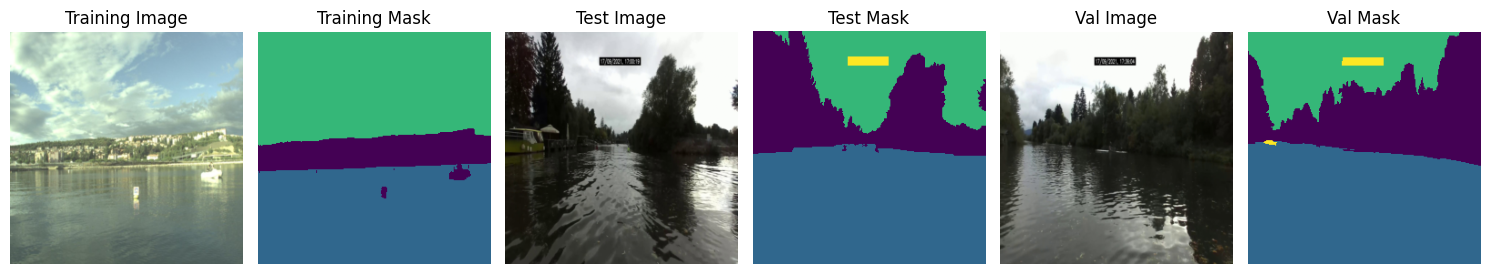

In [4]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

show_dataset_prev(train_loader, test_loader, val_loader, num_images=3, num_classes=config.num_classes)

In [5]:
def train(model, model_name=None,learning_rate = 1e-3,epochs = 300, re_evaluate=False):

    model_filename = f'{model_name}-epochs{epochs}.pth'

    print(count_trainable_parameters(model,format=True))
    
    trainer = MulticlassTrainer(num_classes=config.num_classes,
                    model_filename=model_filename, 
                    model_dir=result_path, 
                    info={'config':''},
                    save_xlsx=True)
    model = trainer.train(model, train_loader, val_loader, test_loader,
                            num_epochs=epochs, 
                            verbose=1, 
                            save_every=5, 
                            learning_rate=learning_rate,
                            continue_from_last=True)
    model.to(device)
    del model
    clear_gpu()
    if re_evaluate:
        trainer.evaluate_model(test_loader, print_stats=True)



# Axial

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial)
train(model, model_name='UMergeNet-axial-1')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial)
train(model, model_name='UMergeNet-axial-2')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial)
train(model, model_name='UMergeNet-axial-3')

# Axial DW

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-axial-dw-1')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-axial-dw-2')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-axial-dw-3')

# Atrous

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous)
train(model, model_name='UMergeNet-atrous-1')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous)
train(model, model_name='UMergeNet-atrous-2')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous)
train(model, model_name='UMergeNet-atrous-3')

# Atrous DW

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-atrous-dw-1')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-atrous-dw-2')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-atrous-dw-3')

# Standard

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Standard)
train(model, model_name='UMergeNet-normal-1')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Standard)
train(model, model_name='UMergeNet-normal-2')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Standard)
train(model, model_name='UMergeNet-normal-3')

# Standard DW

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Standard, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-normal-dw-1')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Standard, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-normal-dw-2')

In [ ]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Standard, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-normal-dw-3')

In [ ]:
import os
os.system('play -nq -t alsa synth 0.2 sine 600; play -nq -t alsa synth 0.2 sine 600')
os.system('play -nq -t alsa synth 0.2 sine 600; play -nq -t alsa synth 0.2 sine 600')
os.system('play -nq -t alsa synth 0.2 sine 600; play -nq -t alsa synth 0.2 sine 600')

In [ ]:
from ImageComparisonGenerator import ImageComparisonGenerator, load_model

model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial)
model1 = load_model(model,"./UMergeNet/UMergeNet-axial-1-epochs300.pth")


import sys
sys.path.append("/mnt/TUDAO/Image_Segmentation")
from network import AttU_Net

model = AttU_Net(img_ch=in_channels, output_ch=num_classes)
model2 = load_model(model,"./LeeJunUNets/AttU_Net-1-best.pth")

icg = ImageComparisonGenerator(model=model1, model_name1="UMergeNet", model2=model2, model_name2="Attention U-Net")
sample = 0
icg.save_output_quad(val_loader, samples=[sample], do_diff=True, invert_diff_colors=True, do_save=f'glas-quad-{sample}.eps')

#predict_and_show_mask(model, val_loader,0)

In [ ]:

from ImageComparisonGenerator import ImageComparisonGenerator, load_model


model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial)
model1 = load_model(model,"./UMergeNet/UMergeNet-axial-1-epochs300.pth")

icg = ImageComparisonGenerator(model)
icg.save_output_row(val_loader, samples=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], do_diff=True, invert_diff_colors=True)
#icg.save_output_row(test_loader, samples=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], do_diff=True, invert_diff_colors=True)

#predict_and_show_mask(model, val_loader,0)